# Titanic Dataset

The **question** for this dataset is to be able to predict who aboard the Titanic was destined to perish by a set of features given to us.  
This is a **Binary Classification** problem that we will be using Python along with the packages: Numpy, Scipy, Scikit-Learn.  As well as some visualization focused packages: Matplotlib and Seaborn.
Personably I am using this modest dataset to practice my Pandas, Scikit-Learn, and Markdown.
> The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

>While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

>In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Source: [*Kaggle*](https://www.kaggle.com/c/titanic/overview)

## Table of Contents
- [Data Dictionary](###Data-Dictionary)
- [Test](###Test)
- [Load Data](###Load-Data)
- [EDA](###EDA)
  - [Whole Dataset](##Whole-Dataset)
  - [PassengerId](##PassengerId)
  - [Survived](##Survived)
  - [Pclass](##Pclass)
  - [Name](##Name)
  - [Sex](##Sex)
  - [Age](##Age)
  - [SibSp](##SibSp)
  - [Parch](##Parch)
  - [Ticket](##Ticket)
  - [Fare](##Fare)
  - [Cabin](##Cabin)
  - [Embarked](##Embarked)
 
**A work in progress..**

### Data Dictionary <a name="data dictionary"></a>


Variable | Definition | Key
:---:|:---:|:---:
survival | Survival | 0 = No, 1 = Yes
pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex | Sex	
Age | Age |in years	
sibsp | # of siblings / spouses aboard the Titanic	
parch | # of parents / children aboard the Titanic	
ticket | Ticket number	
fare | Passenger fare	
cabin | Cabin number	
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes
**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
**Sibling** = brother, sister, stepbrother, stepsister
**Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
**Parent** = mother, father
**Child** = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

---

In [ ]:
# Data wrangling/munging libraries
import pandas as pd
import numpy as np
import scipy as sp

# Visualization Libraries
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data
No need to gather data. Just need to load it.

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
color = ['#377eb8','#ff7f00','#4daf4a','#4daf4a','#984ea3']

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplot:xlabel='Survived', ylabel='Parch'>],
       [<AxesSubplot:xlabel='Age', ylabe

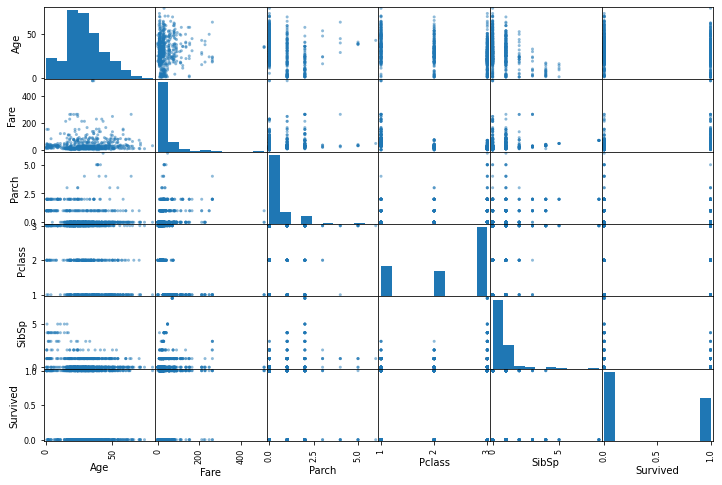

In [7]:
from pandas.plotting import scatter_matrix
numeric = ['Age','Sex','Fare','Parch','Pclass', 'SibSp','Survived']
scatter_matrix(train_data[numeric], figsize=(12,8))

## PassengerID
This column is used as an index column.  We will not use this column in our model.

***

## Survived ##
__These are the Target(y) values__
- Values are nominal/binary.
- 0 = Not Survive
- 1 = Did Survive

We will assign these values to the y variable once we decide how we are going to handle our null values.
```python
y_train = train_data['Survived']
```

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:title={'center':'Distribution of Values'}, ylabel='Frequency'>

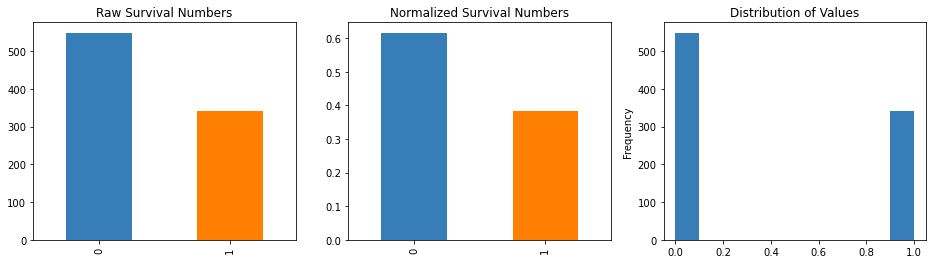

In [104]:
print(train_data.Survived.value_counts())

plt.figure(figsize=[16,4])

plt.subplot(1,3,1)
plt.title('Raw Survival Numbers')
train_data.Survived.value_counts().plot(kind='bar',color=color)

plt.subplot(1,3,2)
plt.title('Normalized Survival Numbers')
train_data.Survived.value_counts(normalize=True).plot(kind='bar',color=color)

plt.subplot(1,3,3)
plt.title('Distribution of Values')
train_data.Survived.plot(kind='hist')

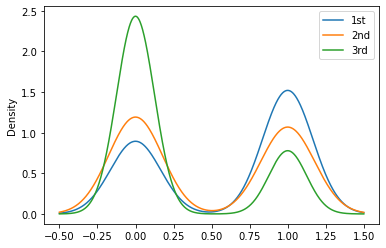

In [9]:
for x in [1,2,3]:
    train_data.Survived[train_data.Pclass == x].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))

***

## Pclass ##
__Ticket Class__

- Values are catigorical, ordinal in type:
  - 1 = First Class Ticket
  - 2 = Second Class Ticket
  - 3 = Third Class Ticket
 
- No NaN

Need to **OneHotEncode** values.

In [109]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:title={'center':'Ticket Class Survived'}>

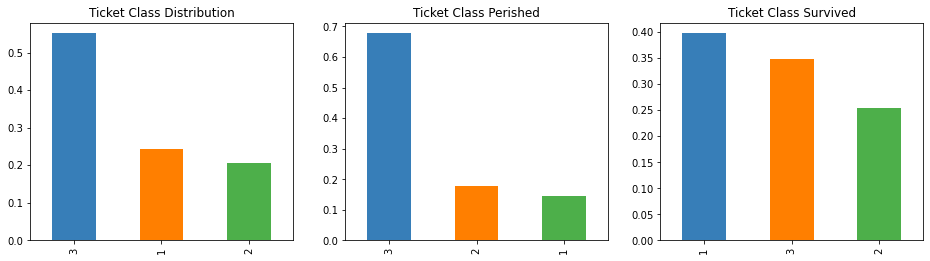

In [107]:
print(train_data.Pclass.value_counts())

plt.figure(figsize=[16,4])

plt.subplot(1,3,1)
plt.title('Ticket Class Distribution')
train_data.Pclass.value_counts(normalize=True).plot(kind='bar',color=color)

plt.subplot(1,3,2)
plt.title('Ticket Class Perished')
train_data.Pclass[train_data.Survived == 0].value_counts(normalize=True).plot(kind='bar',color=color)

plt.subplot(1,3,3)
plt.title('Ticket Class Survived')
train_data.Pclass[train_data.Survived == 1].value_counts(normalize=True).plot(kind='bar',color=color)

***

## Name ##
**Name of the passenger.**
- Values are strings.
- No NaN

This Column doesn't have much use in it's current form. Might come back to it to perform some feature engineering.

*__Dropping__ this column for now.*

In [12]:
train_data.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [13]:
train_data.Name.describe()

count                               891
unique                              891
top       Devaney, Miss. Margaret Delia
freq                                  1
Name: Name, dtype: object

***

## Sex ##
**Gender of passenger**
- Values are categorical, strings
  - Male
  - Female
- No NaN

Need to __OneHotEncode__ values.

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:>

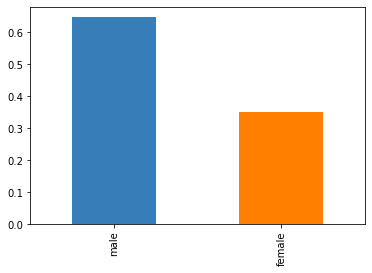

In [89]:
print(train_data.Sex.value_counts())
train_data.Sex.value_counts(normalize=True).plot(kind='bar',color=color)

***

## Age ##
**Age of the Passenger.**
- Values are Numeric, as float64.
- Nan = 177 missing entries that we need to figure out how we want to handle.
  1. Drop Entire Column.
  2. Drop the rows with the NaN.
  3. Fill the NaN with a value(most likely the mean).

In [15]:
train_data.Age.isna().sum()

177

In [16]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

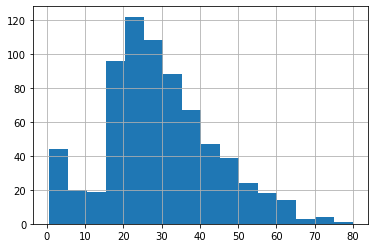

In [17]:
train_data.Age.hist(bins=int(train_data.Age.max()/5))

In [18]:
print(f'Median: {train_data.Age.median()}, Mode:{train_data.Age.mode()}')

Median: 28.0, Mode:0    24.0
dtype: float64


__Is there a relationship between Age and Ticket Class?__

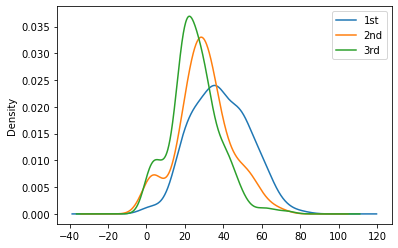

In [19]:
for x in [1,2,3]:
    train_data.Age[train_data.Pclass == x].plot(kind='kde')
plt.legend(('1st', '2nd', '3rd'))

**What kind of ticket did the passengers with missing ages have?**

<AxesSubplot:>

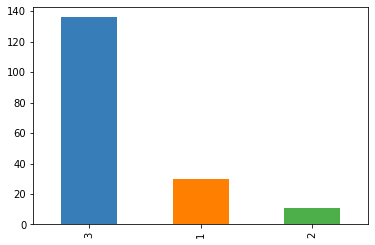

In [90]:
missing_ages = train_data.loc[train_data.Age.isna()]
missing_ages.Pclass.value_counts().plot(kind='bar',color=color)

**Is there a relationshipt between Age and Fare paid?**

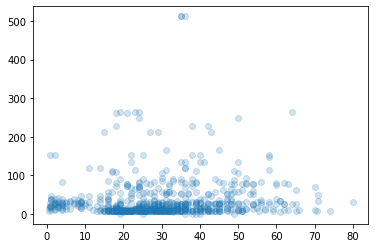

In [94]:
plt.scatter(train_data.Age, train_data.Fare, alpha=.2)

***

## SibSp ## 	
**Number of siblings / spouses aboard the Titanic**
- Values are Catigorical, Nominal dtype=int.
  - 0-5 & 8

In [22]:
train_data.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [23]:
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:>

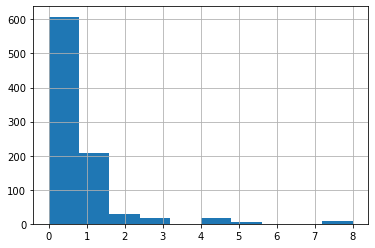

In [24]:
train_data.SibSp.hist()

In [25]:
# for x in [0,1,2,3,4,5,8]:
#     train_data.Survived[train_data.SibSp == x].plot(kind='kde')
# plt.legend(('0','1','2','3','4','5','8'))

***

## Parch ## 
**#of parents / children aboard the Titanic**
- Values are Nominal as float
  - 0-6
- No NaN

In [26]:
train_data.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [27]:
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:>

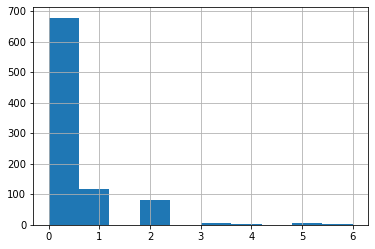

In [28]:
train_data.Parch.hist()

***

## Ticket ##
**Ticket number**
- Values seem to be random with no way to group them.

_**Drop these values**_

In [29]:
train_data.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [30]:
train_data.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
3101295     6
           ..
315151      1
350048      1
17465       1
248731      1
250652      1
Name: Ticket, Length: 681, dtype: int64

***

## Fare ##
**Passenger fare**
- Values are Continuous as float
- Outliers

In [31]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
train_data.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

<AxesSubplot:>

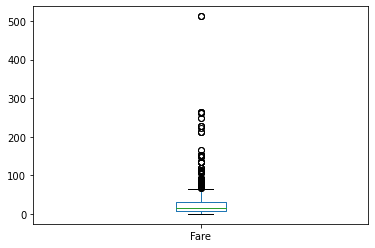

In [33]:
train_data.Fare.plot(kind='box')

<AxesSubplot:>

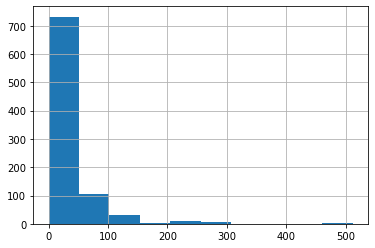

In [34]:
train_data.Fare.hist()

***

## Cabin ##
**Cabin Number**
- Values are Nominal as int
- NaN = 687 that need to be handled.
  1. Drop the entire column.
  2. Drop the rows with NaN.
  3. fill the NaN with a value.
  4. Feature Engineer
  
_**Dropping entire column for now**_

In [35]:
train_data.Cabin.isna().sum()

687

In [36]:
train_data.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [37]:
train_data.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F2             3
              ..
D49            1
C128           1
B69            1
E49            1
A19            1
Name: Cabin, Length: 147, dtype: int64

In [38]:
train_data.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

***

## Embarked ##
**Port of Embarkation**
- Values are Nominal as strings
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton
- NaN = 2 nulls that need to be handled.

In [39]:
train_data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [40]:
train_data.Embarked.isna().sum()

2

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:>

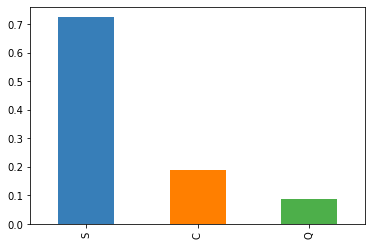

In [95]:
print(train_data.Embarked.value_counts())
train_data.Embarked.value_counts(normalize=True).plot(kind='bar',color=color)

### Test  <a name="Test"></a>

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [43]:
def normalize(df, continuous):
    for feature in continuous:
        min_value = df[feature].min()
        max_value = df[feature].max()
#         df[feature] = (df[feature] - df.mean()) / df[feature].std()
        df[feature] = (df[feature] - min_value) / (max_value - min_value)
    return df

In [44]:
# New DF to keep original values intact.
categories = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X_train = train_data[categories]
y_train = train_data['Survived']
X_test = test_data[categories]

# Fill the 3 NaN Embarked entries with the mode.
X_train.Embarked.fillna(train_data.Embarked.mode()[0], inplace=True)
X_test.Embarked.fillna(train_data.Embarked.mode()[0], inplace=True)
X_test.Fare.fillna(train_data.Fare.mean(), inplace=True)

# fill the 177 NaN Age entries with the median.
median = train_data.Age.median()
X_train.Age.fillna(median, inplace=True)
X_test.Age.fillna(median, inplace=True)

# Apply a Min/Max normilization to our continuous values
continuous = ['Age','Fare']
X_train = normalize(X_train, continuous)
X_test = normalize(X_test, continuous)

# pd.to_numeric(X_train, downcast='float')
# Use get_dummies as our category encoder.
categories = ['Pclass','Sex','SibSp','Parch','Embarked']
X_train = pd.get_dummies(X_train, columns=categories, prefix=categories)
X_test = pd.get_dummies(X_test, columns=categories, prefix=categories)  
X_test.drop(columns='Parch_9', axis=1, inplace=True)

C:\Users\Brian\miniconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Brian\miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
# RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))
predictions = clf.predict(X_test)
output0 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

0.8428731762065096


In [46]:
# AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=200, random_state=1)
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))
predictions = clf.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()
output1 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

0.8529741863075196


## Below is a streamlined data preprocessing pipeline  ##
Will be using this once we are happy with data **Processing** and **Feature Extraction**.

Makes it easier to do hyper paramater training.

In [47]:
'''
y_train = train_data.Survived
columns = ['Age','Fare','Embarked','Sex','Pclass']
X_train = train_data[columns]
X_test = test_data[columns]
'''

"\ny_train = train_data.Survived\ncolumns = ['Age','Fare','Embarked','Sex','Pclass']\nX_train = train_data[columns]\nX_test = test_data[columns]\n"

In [48]:
'''
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])
'''

"\nnumeric_features = ['Age', 'Fare']\nnumeric_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='median')),\n    ('scaler', StandardScaler())\n])\n\ncategorical_features = ['Embarked', 'Sex', 'Pclass']\ncategorical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),\n    ('onehot', OneHotEncoder(handle_unknown='ignore'))\n])\n\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', numeric_transformer, numeric_features),\n        ('cat', categorical_transformer, categorical_features)\n])\n"

In [49]:
'''
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression())])
fit_model_pipeline = model_pipeline.fit(X_train,y_train)
print('model score: %.3f' % fit_model_pipeline.score(X_train,y_train))
'''

"\nmodel_pipeline = Pipeline(steps=[('preprocessor', preprocessor),\n                                ('classifier', LogisticRegression())])\nfit_model_pipeline = model_pipeline.fit(X_train,y_train)\nprint('model score: %.3f' % fit_model_pipeline.score(X_train,y_train))\n"

In [50]:
'''
predict = model_pipeline.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predict})
'''

"\npredict = model_pipeline.predict(X_test)\noutput = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predict})\n"

##### Use this to create csv to submit to kaggle #####

In [51]:
# output.to_csv('/submissions/AdaBoostClassifier.csv', index=False)